In [1]:
import pandas as pd

In [1]:
from dotenv import load_dotenv
load_dotenv('../../extractors/.env')

True

In [3]:
import boto3
boto3.resource("s3").Bucket("auto-shorts").download_file("data/preds_labels_common_model_additional_label_comedy_last_sports_30_perc.json", "preds_labels_common_model_additional_label_comedy_last_sports_30_perc.json")

In [4]:
df = pd.read_json("preds_labels_common_model_additional_label_comedy_last_sports_30_perc.json")

In [5]:
df.columns.tolist()

['sQDrj7JOAYQ',
 'u6g41E3RaYo',
 'uCSqeI29D_I',
 'VeYRaOV0I_Y',
 'w6OJl42Ntko',
 'WA4a8ouaars',
 'WA5_ledA_9k',
 'wdAva6xBjOQ',
 'xYQ28eu35gI',
 'YecCEmjLSmY',
 'YpjwHazhknA']

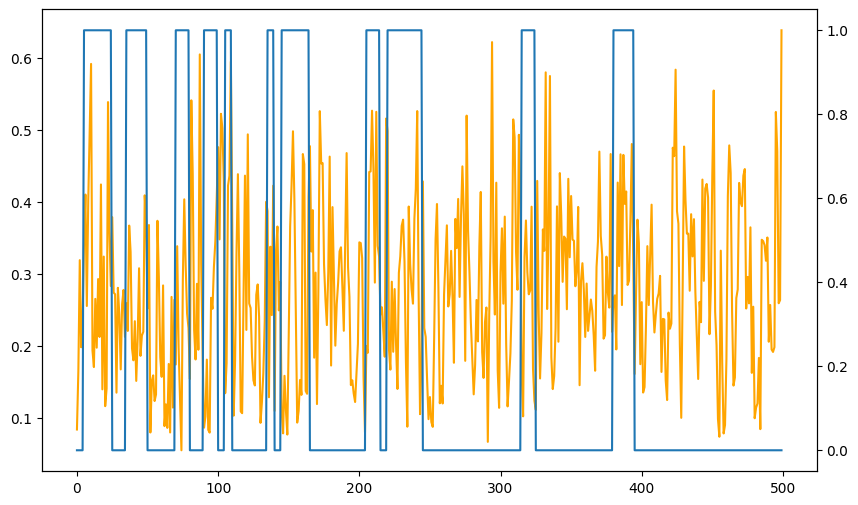

In [6]:
import matplotlib.pyplot as plt
vid_id = 'sQDrj7JOAYQ'
fig, ax1 = plt.subplots(figsize=(10, 6))
# plot preds on one axis and labels on second one
ax1.plot(df[vid_id]['preds'], color='orange')
ax2 = ax1.twinx()
ax2.plot(df[vid_id]['labels'])


In [7]:
for col in df.columns.tolist():
    if len(df[col]['preds']) != len(df[col]['labels']):
        print(f"Skipping {col}")
        df = df.drop(col, axis=1)

Skipping u6g41E3RaYo
Skipping YecCEmjLSmY


In [61]:
from importlib import reload
import metrics as m
reload(m)

mc = m.MetricCalculator(df)
mc.metrics # 0.556045

2024-10-03 22:45:57.330 | INFO     | metrics:extract_labels_preds:54 - Extracting labels and preds from DataFrame
2024-10-03 22:45:57.331 | INFO     | metrics:extract_labels_preds_top_k:38 - Extracting labels and preds for top 5 moments from DataFrame
2024-10-03 22:45:57.333 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-03 22:47:07.420 | INFO     | metrics:maximize_class_metrics:120 - Maximizing class metrics
2024-10-03 22:47:07.422 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold
2024-10-03 22:47:07.428 | INFO     | metrics:get_top_k_metrics:105 - Calculating metrics for top 5 moments
2024-10-03 22:47:07.429 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-03 22:47:07.434 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold


,index,threshold,value
0,f1,0.071712,0.451107
1,accuracy,0.620534,0.711556
2,precision,0.700691,0.600000
3,recall,0.018690,1.000000
4,kappa,0.390751,0.104575
0,roc_auc,NaN,0.552437
1,average_precision,NaN,0.353848
0,accuracy_top5,0.569774,0.622222
1,f1_top5,0.569774,0.767123
2,kappa_top5,0.569774,0.000000


In [4]:
import metrics as m

all_metrics = []

for obj in boto3.resource("s3").Bucket("auto-shorts").objects.filter(Prefix="data/").all():
    if not obj.key.startswith('data/videos/') and obj.key.endswith('.json'):
        highlight_rt = obj.key[:-5].split("/")[-1]
        boto3.resource("s3").Bucket("auto-shorts").download_file(f"data/{highlight_rt}.json", f"{highlight_rt}.json")
        df = pd.read_json(f"{highlight_rt}.json")
        for col in df.columns.tolist():
            if len(df[col]['preds']) != len(df[col]['labels']):
                print(f"Skipping {col}")
                df = df.drop(col, axis=1)
        all_metrics.append(m.MetricCalculator(df).metrics.assign(highlight_ratio=highlight_rt))
        print(f"Done with {highlight_rt}")

2024-10-04 13:10:50.334 | INFO     | metrics:extract_labels_preds:54 - Extracting labels and preds from DataFrame
2024-10-04 13:10:50.335 | INFO     | metrics:extract_labels_preds_top_k:38 - Extracting labels and preds for top 5 moments from DataFrame
2024-10-04 13:10:50.340 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold


KeyboardInterrupt: 

In [ ]:
all_metrics = pd.concat(all_metrics)
all_metrics
# all_metrics.to_csv("../data/metrics_sport_vids.csv", index=False)

In [ ]:
all_metrics[(all_metrics['index'] == 'average_precision') | (all_metrics['index'] == 'average_precision_top5')]

In [ ]:
all_metrics[(all_metrics['index'] == 'f1') | (all_metrics['index'] == 'f1_top5')]

In [ ]:
all_metrics.to_csv("../data/metrics_all_models.csv", index=False)

In [22]:
metrics_sports = pd.read_csv("../data/metrics_sport_vids.csv")
metrics_sports[(metrics_sports['index'] == 'average_precision') | (metrics_sports['index'] == 'average_precision_top5')]

,index,threshold,value,highlight_ratio
6,average_precision,NaN,0.129459,preds_labels_10_perc
13,average_precision_top5,NaN,0.243900,preds_labels_10_perc
20,average_precision,NaN,0.190677,preds_labels_15_perc
27,average_precision_top5,NaN,0.519450,preds_labels_15_perc
34,average_precision,NaN,0.213430,preds_labels_20_perc
41,average_precision_top5,NaN,0.432466,preds_labels_20_perc
48,average_precision,NaN,0.241969,preds_labels_25_perc
55,average_precision_top5,NaN,0.349986,preds_labels_25_perc
62,average_precision,NaN,0.322803,preds_labels_30_perc
69,average_precision_top5,NaN,0.658278,preds_labels_30_perc


In [23]:
metrics_sports[(metrics_sports['index'] == 'f1') | (metrics_sports['index'] == 'f1_top5')]


,index,threshold,value,highlight_ratio
0,f1,7.302340e-02,0.188285,preds_labels_10_perc
8,f1_top5,8.366333e-01,0.416667,preds_labels_10_perc
14,f1,7.974493e-04,0.261606,preds_labels_15_perc
22,f1_top5,9.038951e-01,0.571429,preds_labels_15_perc
28,f1,8.189845e-06,0.322532,preds_labels_20_perc
36,f1_top5,9.654601e-01,0.515625,preds_labels_20_perc
42,f1,4.917386e-07,0.387509,preds_labels_25_perc
50,f1_top5,9.972608e-01,0.480000,preds_labels_25_perc
56,f1,1.460427e-08,0.451618,preds_labels_30_perc
64,f1_top5,9.982424e-01,0.689655,preds_labels_30_perc


In [134]:
boto3.resource("s3").Bucket("auto-shorts").download_file("data/preds_labels_comedy_10_perc.json", "preds_labels_comedy_10_perc.json")
df = pd.read_json("preds_labels_comedy_10_perc.json")

In [40]:
df.columns

Index(['sQDrj7JOAYQ', 'uCSqeI29D_I', 'VeYRaOV0I_Y', 'w6OJl42Ntko',
       'WA4a8ouaars', 'WA5_ledA_9k', 'wdAva6xBjOQ', 'xYQ28eu35gI',
       'YpjwHazhknA'],
      dtype='object')

In [2]:
import sys
sys.path.append('../auto_shorts/upload/db')
from utils import postgres_engine

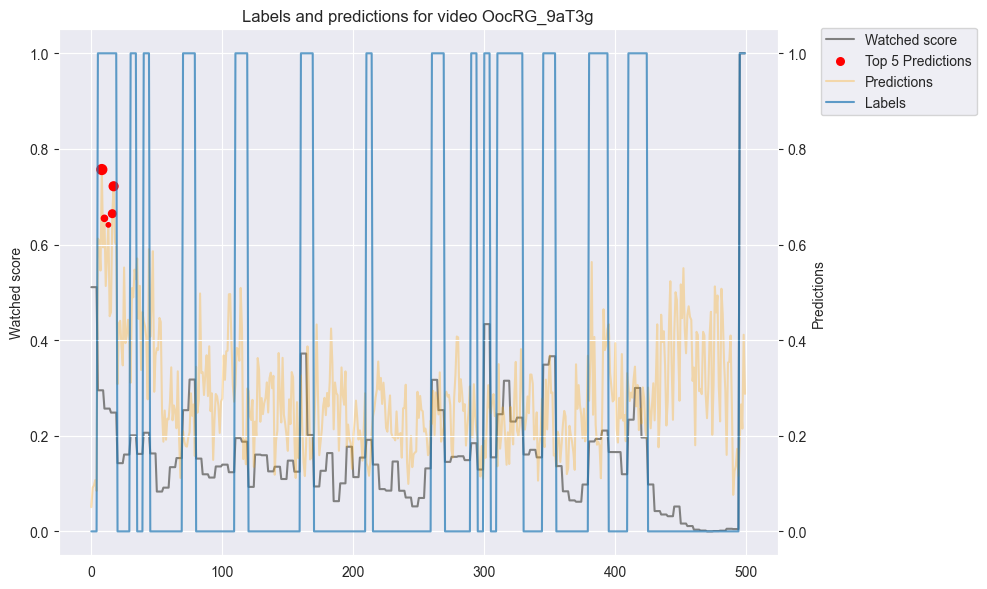

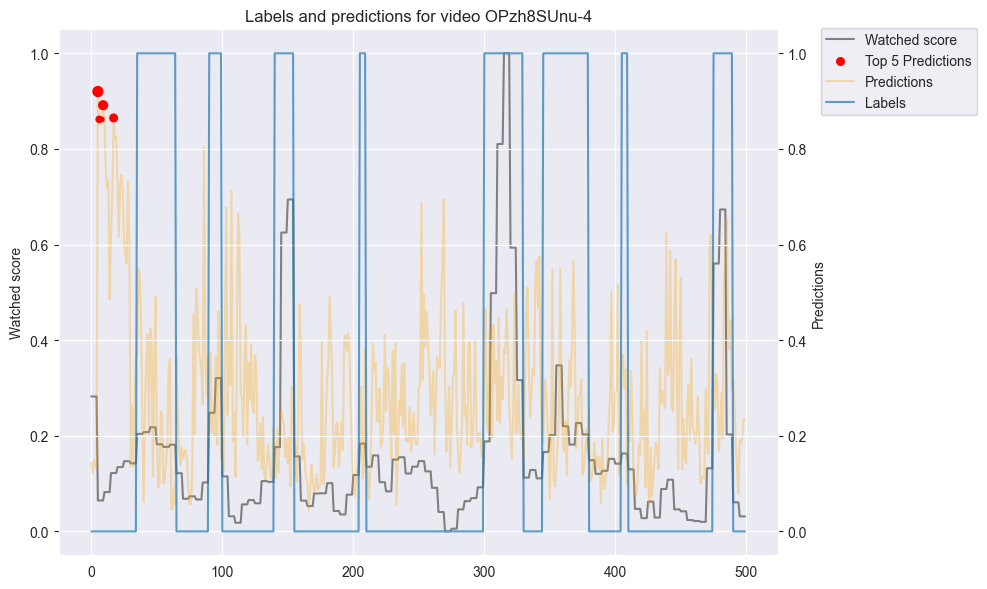

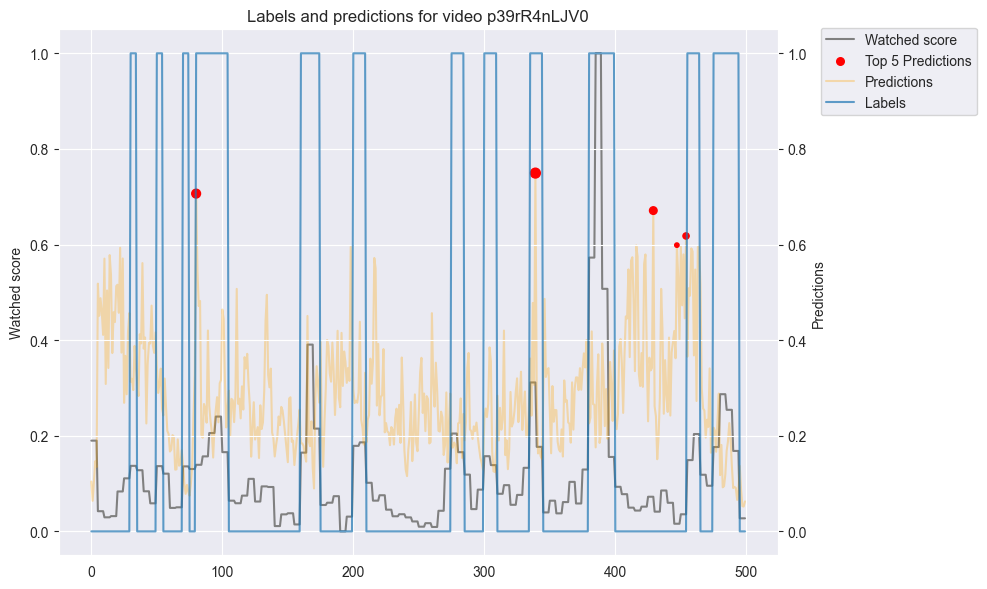

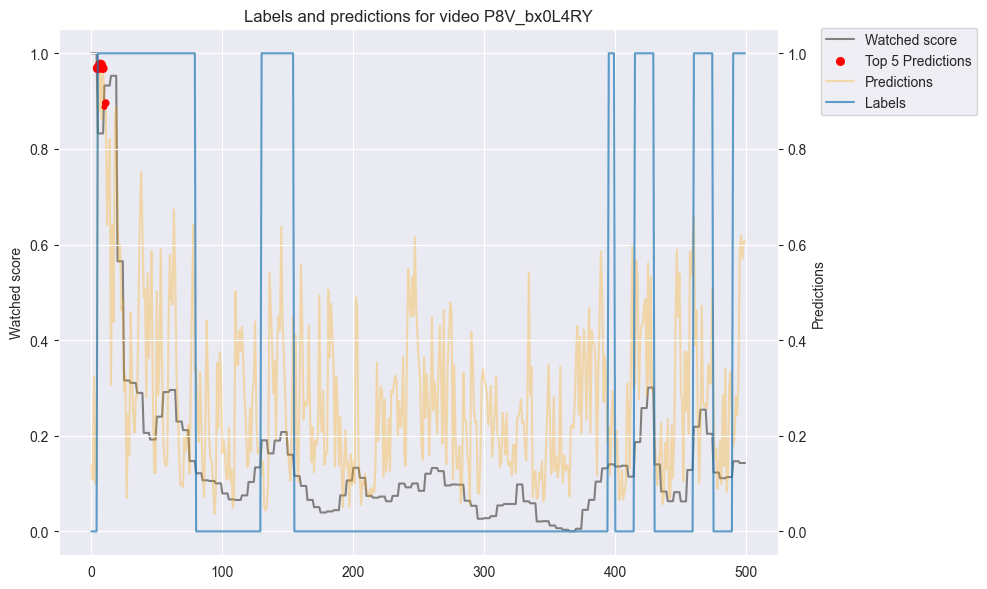

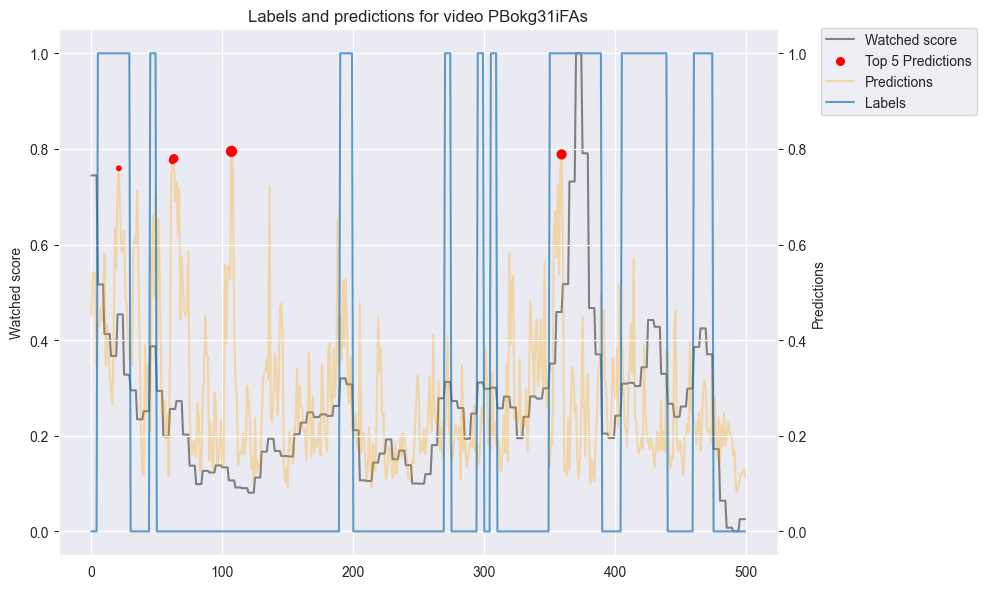

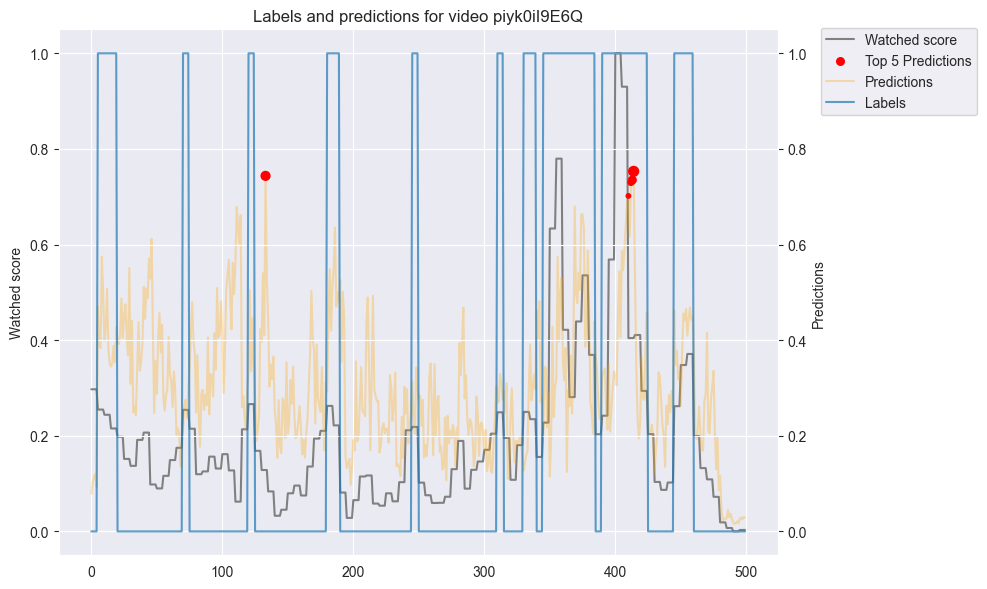

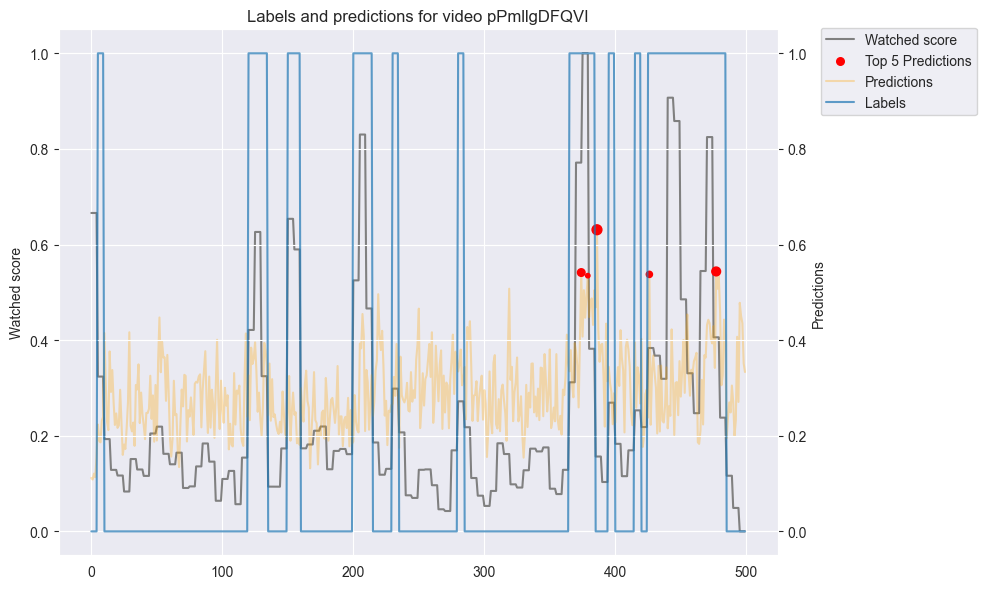

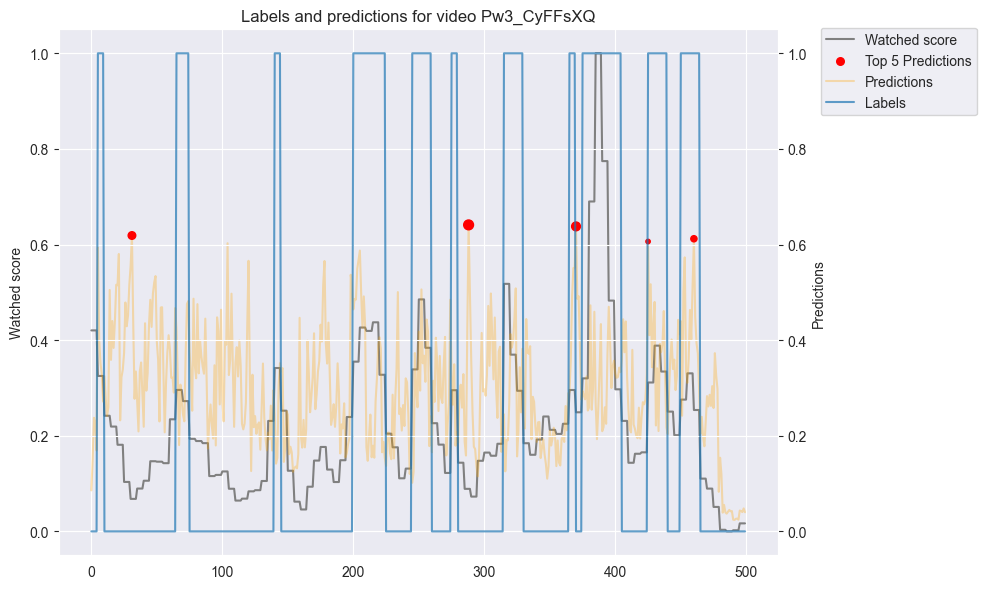

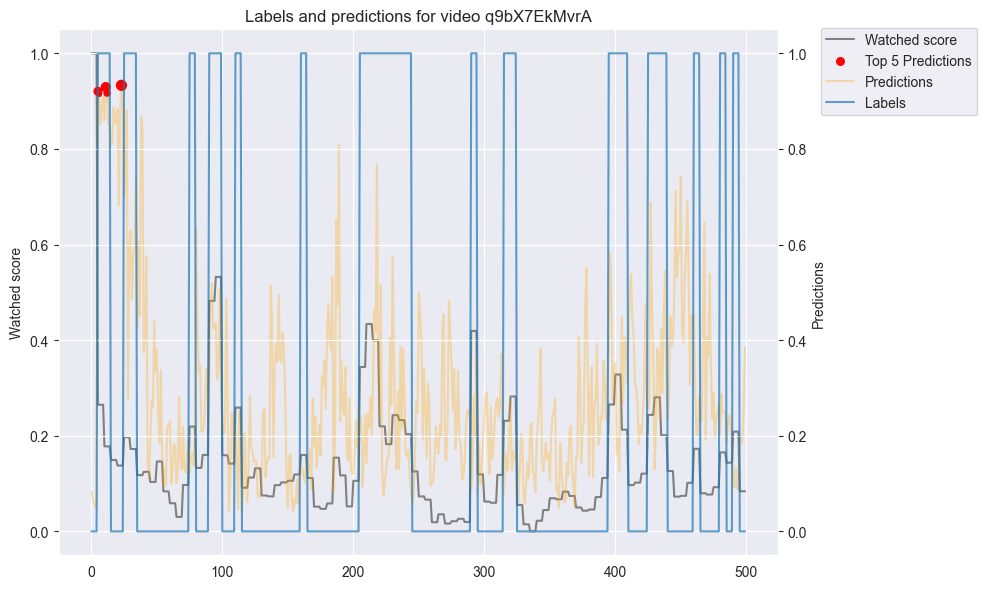

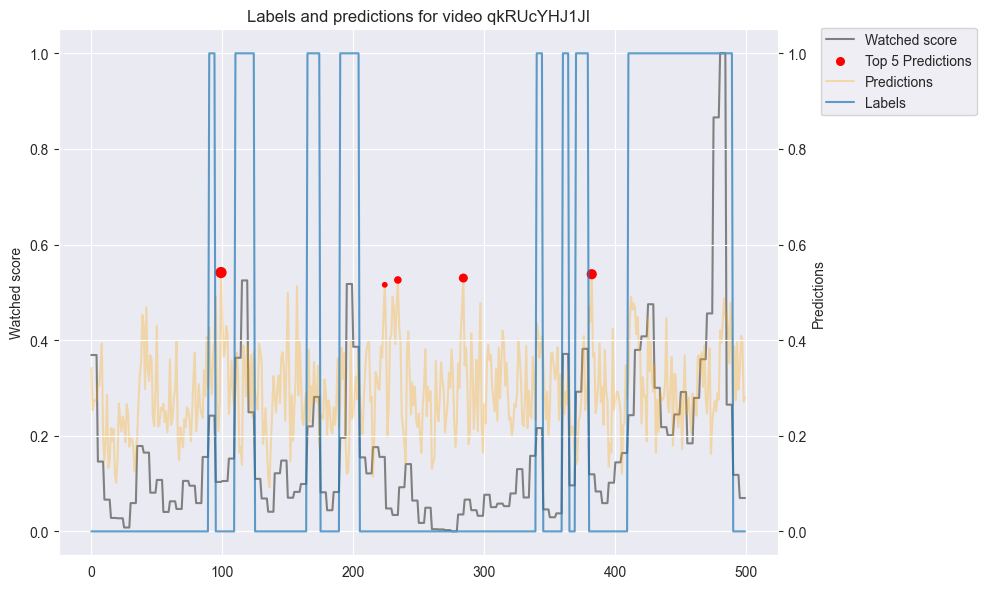

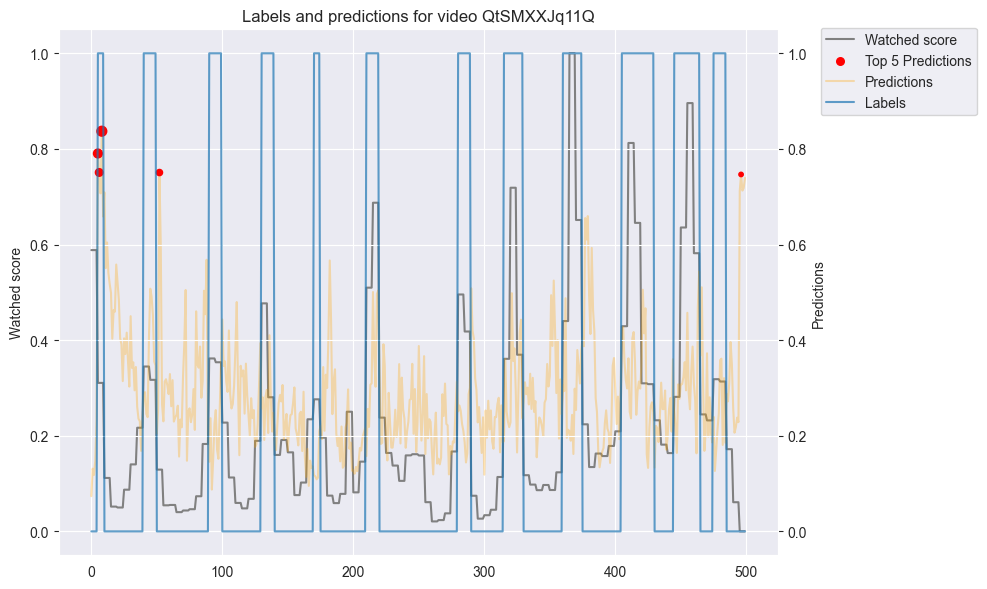

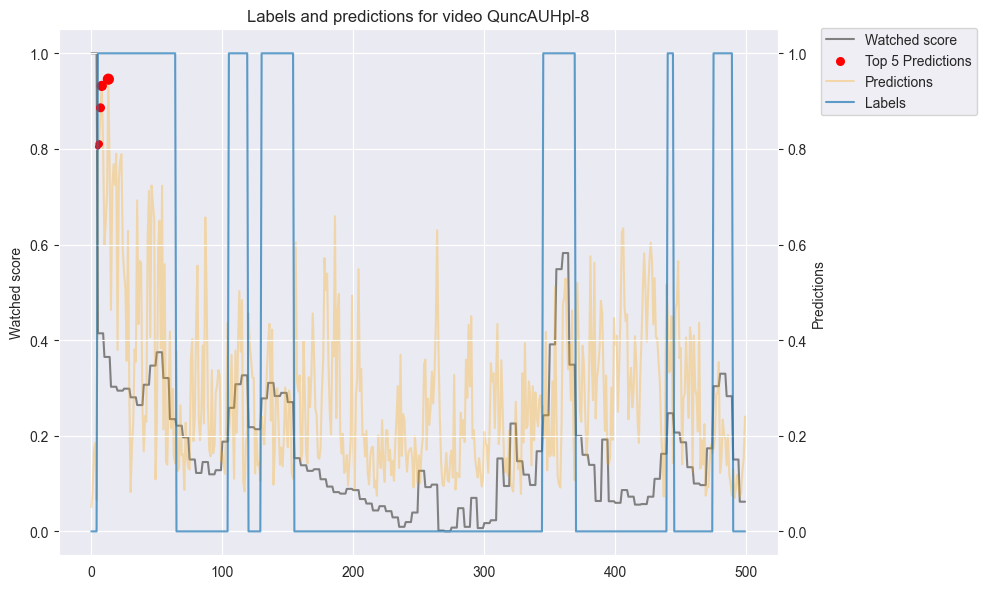

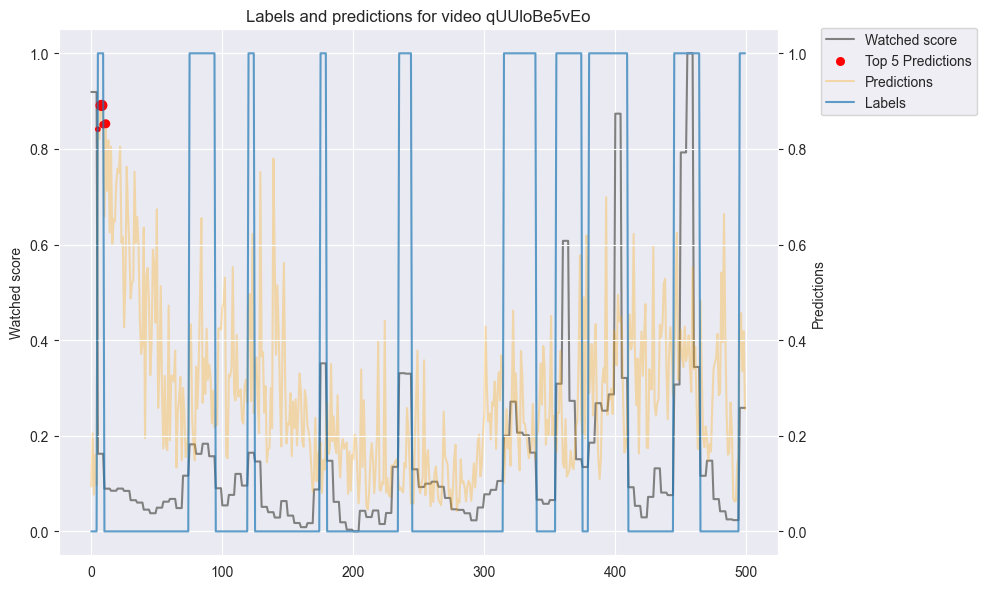

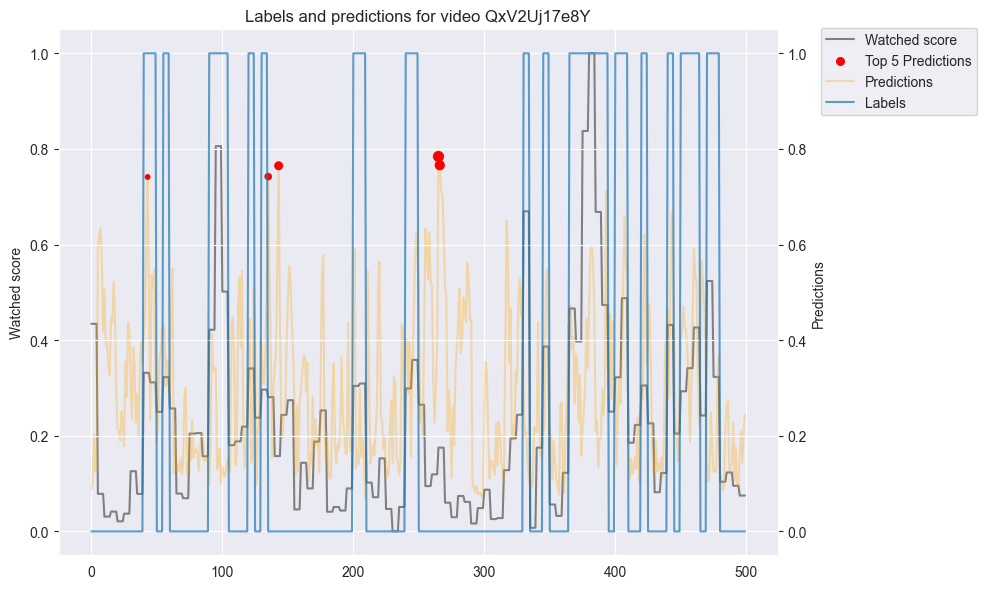

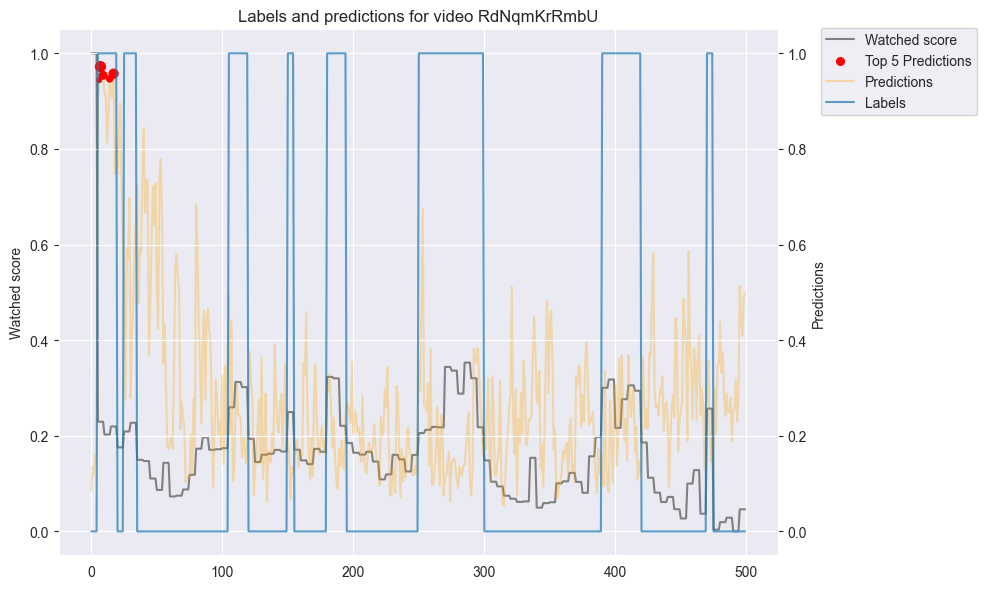

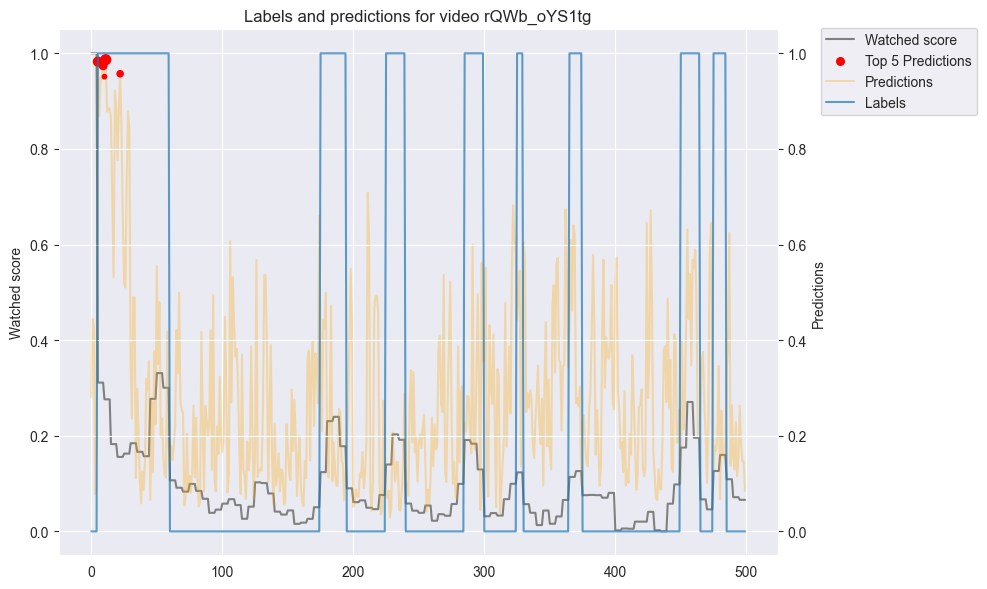

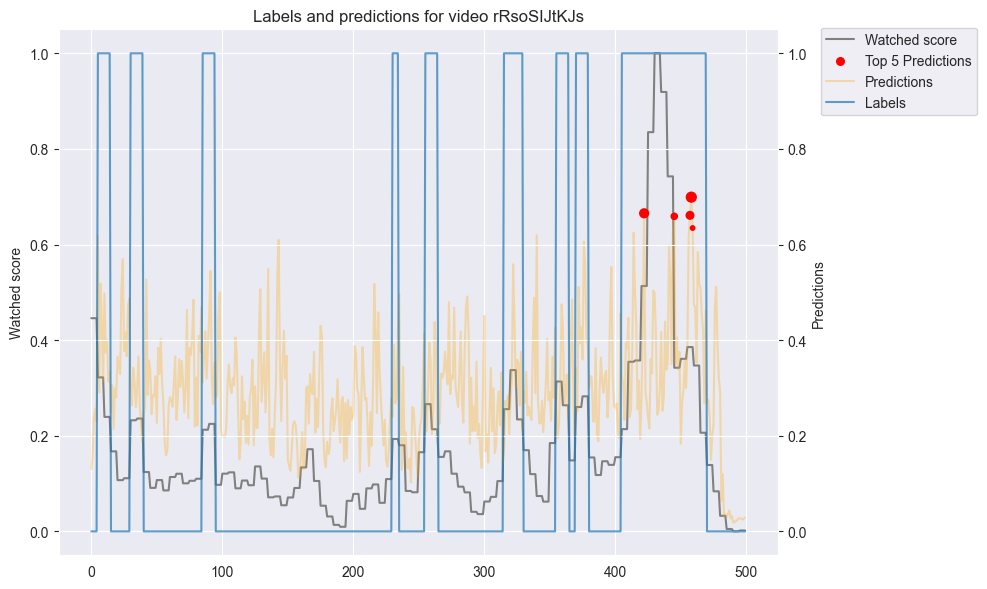

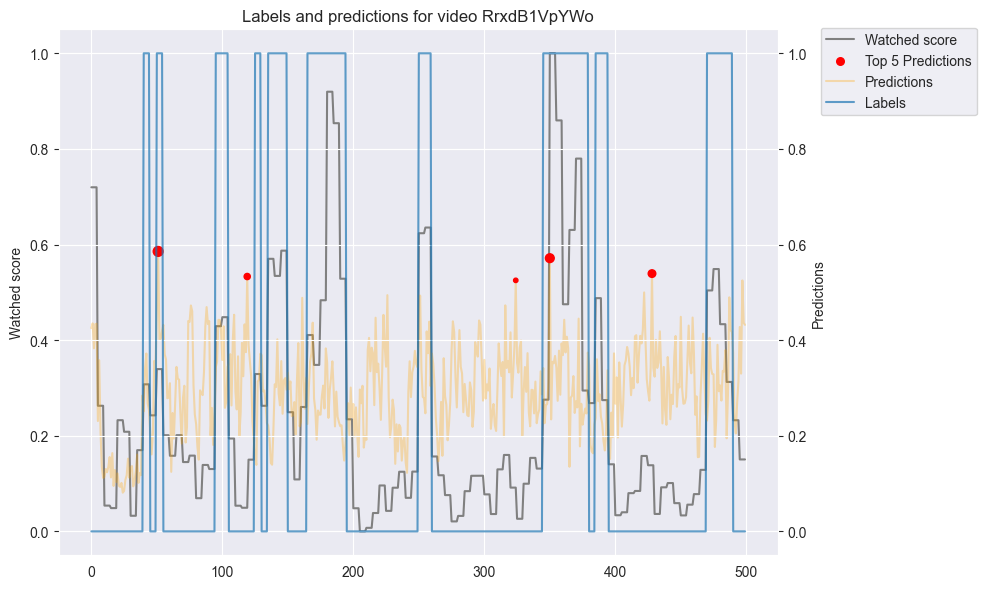

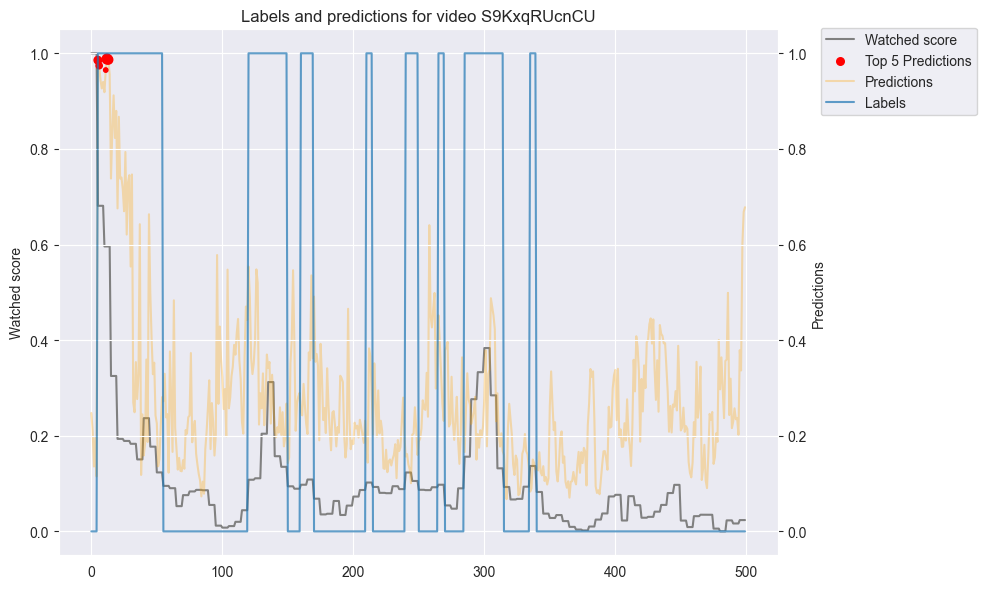

In [7]:
import boto3
import pandas as pd
model_id = "preds_labels_common_model_additional_label_sports_last_sports_30_perc"
boto3.resource("s3").Bucket("auto-shorts").download_file(f"data/{model_id}.json", f"{model_id}.json")
df = pd.read_json(f"{model_id}.json")
for col in df.columns.tolist():
    if len(df[col]['preds']) != len(df[col]['labels']):
        print(f"Skipping {col}")
        # df = df.drop(col, axis=1)
        continue
    import json
    vid_path = pd.read_sql('select s3_path from videos where id = %s', con=postgres_engine, params=(col,)).iloc[0,0]
    boto3.resource("s3").Bucket("auto-shorts").download_file(f"{vid_path}/video_data.json", "video_data.json")
    with open("video_data.json") as f:
        moments = pd.DataFrame(
                        json.load(f)["most_watched_moments"]
                    )
    watched_score = pd.concat([moments, moments.assign(time_start_ms=moments['time_start_ms']+1), moments.assign(time_start_ms=moments['time_start_ms']+2), moments.assign(time_start_ms=moments['time_start_ms']+3), moments.assign(time_start_ms=moments['time_start_ms']+4)]).sort_values('time_start_ms').reset_index()['intensity_score']
    import heapq
    preds_vid = heapq.nlargest(5, df[col].loc["preds"])
    indices_vid = [df[col].loc["preds"].index(p) for p in preds_vid]
    import matplotlib.pyplot as plt
    fig, ax1 = plt.subplots(figsize=(10, 6))
    # plot preds on one axis and labels on second one
    line1, =ax1.plot(watched_score, color='grey', label="Watched score")
    # plot preds on one axis and labels on second one
    line2, =ax1.plot(df[col]['preds'], color='orange', alpha=0.3, label="Predictions")
    ax2 = ax1.twinx()
    line3, = ax2.plot(df[col]['labels'], alpha=0.7, label="Labels")
    scatter = ax2.scatter(indices_vid, preds_vid, color='red', s=[50-i*10 for i in range(5)], label="Top 5 Predictions")
    # add title
    ax1.set_title(f"Labels and predictions for video {col}")
    # add title for left axis
    ax1.set_ylabel("Watched score")
    # add title for right axis
    ax2.set_ylabel("Predictions")
    lines = [line1, scatter, line2, line3]
    labels = [handle.get_label() for handle in lines]
    
    # Create a combined legend
    ax1.legend(lines, labels, loc="center left", bbox_to_anchor=(1.05, 0.92))
    plt.tight_layout()
    plt.show()
    #ax1.legend(["Watched score", "Predictions"], loc='upper left')
    #ax2.legend(["Labels", "Top 5 Predictions"], loc='upper right')

In [8]:
df.columns

Index(['OocRG_9aT3g', 'OPzh8SUnu-4', 'p39rR4nLJV0', 'P8V_bx0L4RY',
       'PBokg31iFAs', 'piyk0iI9E6Q', 'pPmllgDFQVI', 'Pw3_CyFFsXQ',
       'q9bX7EkMvrA', 'qkRUcYHJ1JI', 'QtSMXXJq11Q', 'QuncAUHpl-8',
       'qUUloBe5vEo', 'QxV2Uj17e8Y', 'RdNqmKrRmbU', 'rQWb_oYS1tg',
       'rRsoSIJtKJs', 'RrxdB1VpYWo', 'S9KxqRUcnCU'],
      dtype='object')

In [22]:
vid_id = 'p39rR4nLJV0'

In [23]:
import json
vid_path = pd.read_sql('select s3_path from videos where id = %s', con=postgres_engine, params=(vid_id,)).iloc[0,0]
boto3.resource("s3").Bucket("auto-shorts").download_file(f"{vid_path}/video_data.json", "video_data.json")
with open("video_data.json") as f:
    moments = pd.DataFrame(
                    json.load(f)["most_watched_moments"]
                )
watched_score = pd.concat([moments, moments.assign(time_start_ms=moments['time_start_ms']+1), moments.assign(time_start_ms=moments['time_start_ms']+2), moments.assign(time_start_ms=moments['time_start_ms']+3), moments.assign(time_start_ms=moments['time_start_ms']+4)]).sort_values('time_start_ms').reset_index()['intensity_score']

In [24]:
import heapq
preds_vid = heapq.nlargest(5, df[vid_id].loc["preds"])
indices_vid = [df[vid_id].loc["preds"].index(p) for p in preds_vid]

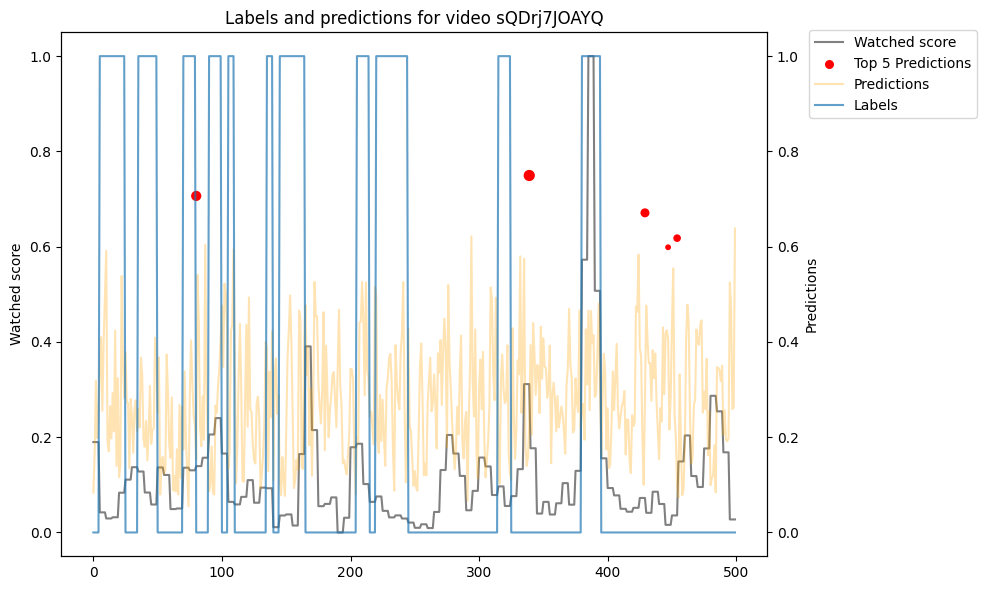

In [62]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(10, 6))
# plot preds on one axis and labels on second one
line1, =ax1.plot(watched_score, color='grey', label="Watched score")
# plot preds on one axis and labels on second one
line2, =ax1.plot(df[vid_id]['preds'], color='orange', alpha=0.3, label="Predictions")
ax2 = ax1.twinx()
line3, = ax2.plot(df[vid_id]['labels'], alpha=0.7, label="Labels")
scatter = ax2.scatter(indices_vid, preds_vid, color='red', s=[50-i*10 for i in range(5)], label="Top 5 Predictions")
# add title
ax1.set_title(f"Labels and predictions for video {vid_id}")
# add title for left axis
ax1.set_ylabel("Watched score")
# add title for right axis
ax2.set_ylabel("Predictions")
lines = [line1, scatter, line2, line3]
labels = [handle.get_label() for handle in lines]

# Create a combined legend
ax1.legend(lines, labels, loc="center left", bbox_to_anchor=(1.05, 0.92))
plt.tight_layout()
#ax1.legend(["Watched score", "Predictions"], loc='upper left')
#ax2.legend(["Labels", "Top 5 Predictions"], loc='upper right')

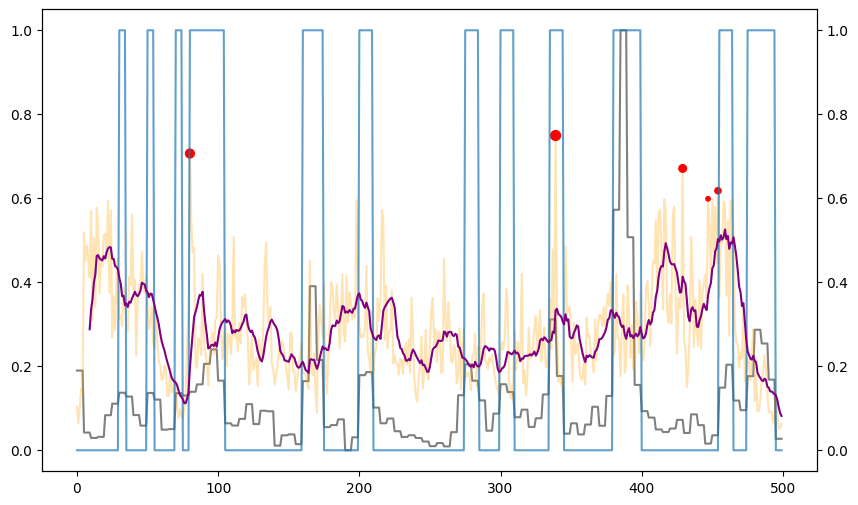

In [27]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(10, 6))
# plot preds on one axis and labels on second one
ax1.plot(watched_score, color='grey')
# plot preds on one axis and labels on second one
ax1.plot(df[vid_id]['preds'], color='orange', alpha=0.3)
ax2 = ax1.twinx()
ax2.plot(df[vid_id]['labels'], alpha=0.7)
ax2.scatter(indices_vid, preds_vid, color='red', s=[50-i*10 for i in range(5)])
# add line plot of moving average of preds
ax2.plot(pd.Series(df[vid_id]['preds']).rolling(window=10).mean(), color='purple')